In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Downloads/data-export (1).csv")

In [4]:
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [5]:
df.columns=df.iloc[0]
df = df.drop(index=0).reset_index(drop=True)
df.columns = ["Channel Group", "DateHour", "Users", "Sessions", "Engaged Sessions", "Average Engagement time per Session", "Engaged Sessions per User", "Events per Session", "Engagement Rate", "Event Count"]

In [6]:
df.head()

,Channel Group,DateHour,Users,Sessions,Engaged Sessions,Average Engagement time per Session,Engaged Sessions per User,Events per Session,Engagement Rate,Event Count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Channel Group                        3182 non-null   object
 1   DateHour                             3182 non-null   object
 2   Users                                3182 non-null   object
 3   Sessions                             3182 non-null   object
 4   Engaged Sessions                     3182 non-null   object
 5   Average Engagement time per Session  3182 non-null   object
 6   Engaged Sessions per User            3182 non-null   object
 7   Events per Session                   3182 non-null   object
 8   Engagement Rate                      3182 non-null   object
 9   Event Count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


In [9]:
df["DateHour"]=pd.to_datetime(df["DateHour"], format="%Y%m%d%H", errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Channel Group                        3182 non-null   object        
 1   DateHour                             3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   object        
 3   Sessions                             3182 non-null   object        
 4   Engaged Sessions                     3182 non-null   object        
 5   Average Engagement time per Session  3182 non-null   object        
 6   Engaged Sessions per User            3182 non-null   object        
 7   Events per Session                   3182 non-null   object        
 8   Engagement Rate                      3182 non-null   object        
 9   Event Count                          3182 non-null   object        
dtypes: datetime6

In [11]:
df.head()

,Channel Group,DateHour,Users,Sessions,Engaged Sessions,Average Engagement time per Session,Engaged Sessions per User,Events per Session,Engagement Rate,Event Count
0,Direct,2024-04-16 23:00:00,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024-04-17 23:00:00,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [13]:
numeric_cols=df.columns.drop(["Channel Group", "DateHour"])
df[numeric_cols]=df[numeric_cols].apply(pd.to_numeric, errors='coerce')
df["Hour"]=df["DateHour"].dt.hour

In [14]:
df.head()

,Channel Group,DateHour,Users,Sessions,Engaged Sessions,Average Engagement time per Session,Engaged Sessions per User,Events per Session,Engagement Rate,Event Count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Channel Group                        3182 non-null   object        
 1   DateHour                             3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged Sessions                     3182 non-null   int64         
 5   Average Engagement time per Session  3182 non-null   float64       
 6   Engaged Sessions per User            3182 non-null   float64       
 7   Events per Session                   3182 non-null   float64       
 8   Engagement Rate                      3182 non-null   float64       
 9   Event Count                          3182 non-null   int64         
 10  Hour        

In [16]:
df.describe()

,DateHour,Users,Sessions,Engaged Sessions,Average Engagement time per Session,Engaged Sessions per User,Events per Session,Engagement Rate,Event Count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


# Sessions and User over time

In [17]:
sns.set(style="whitegrid")

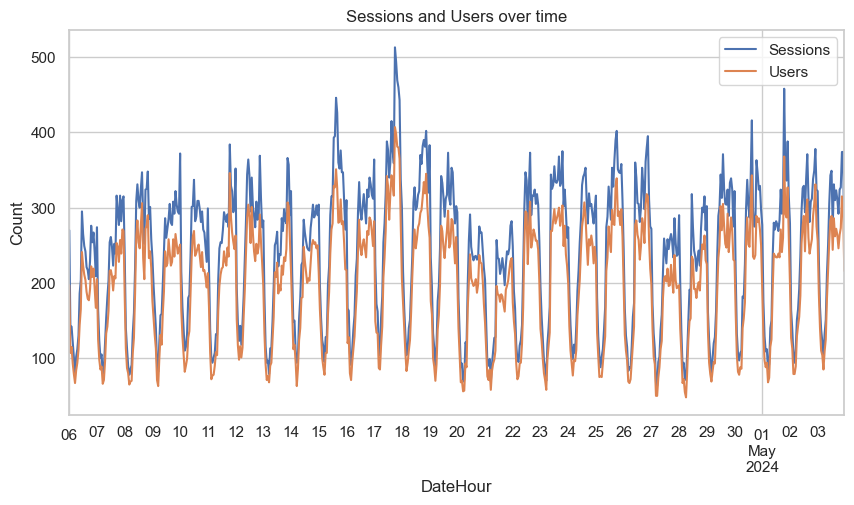

In [20]:
plt.figure(figsize=(10,5))
df.groupby("DateHour")[["Sessions","Users"]].sum().plot(ax=plt.gca())
plt.title("Sessions and Users over time")
plt.xlabel("DateHour")
plt.ylabel("Count")
plt.show()

# Total Users By Channel

In [21]:
df.head()

,Channel Group,DateHour,Users,Sessions,Engaged Sessions,Average Engagement time per Session,Engaged Sessions per User,Events per Session,Engagement Rate,Event Count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


C:\Users\Hritwik Das\AppData\Local\Temp\ipykernel_25228\4061747965.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Channel Group", y="Users", estimator=np.sum, palette="viridis")


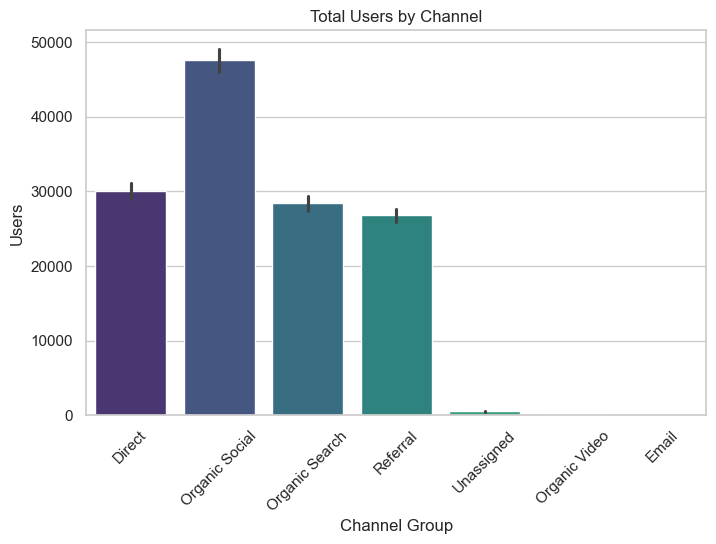

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Channel Group", y="Users", estimator=np.sum, palette="viridis")
plt.title("Total Users by Channel")
plt.xticks(rotation=45)
plt.show()

# Average Engagement Time by Channel

C:\Users\Hritwik Das\AppData\Local\Temp\ipykernel_25228\2822068488.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Channel Group", y="Average Engagement time per Session", estimator=np.mean, palette="magma")


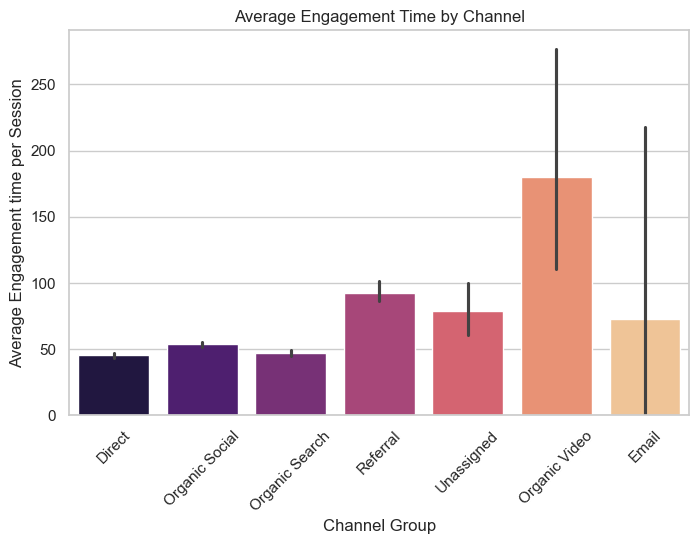

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Channel Group", y="Average Engagement time per Session", estimator=np.mean, palette="magma")
plt.title("Average Engagement Time by Channel")
plt.xticks(rotation=45)
plt.show()

In [25]:
df.head()


,Channel Group,DateHour,Users,Sessions,Engaged Sessions,Average Engagement time per Session,Engaged Sessions per User,Events per Session,Engagement Rate,Event Count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


# Engagement Rate Distribution by Channel

C:\Users\Hritwik Das\AppData\Local\Temp\ipykernel_25228\3994774694.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Channel Group", y="Engagement Rate", palette="coolwarm")


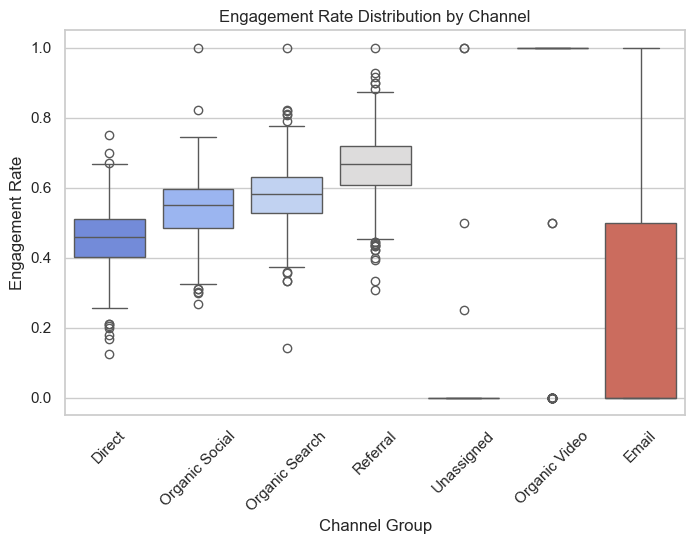

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Channel Group", y="Engagement Rate", palette="coolwarm")
plt.title("Engagement Rate Distribution by Channel")
plt.xlabel("Channel Group")
plt.ylabel("Engagement Rate")
plt.xticks(rotation=45)
plt.show()

# Engaged vs Non-Engaged Sessions

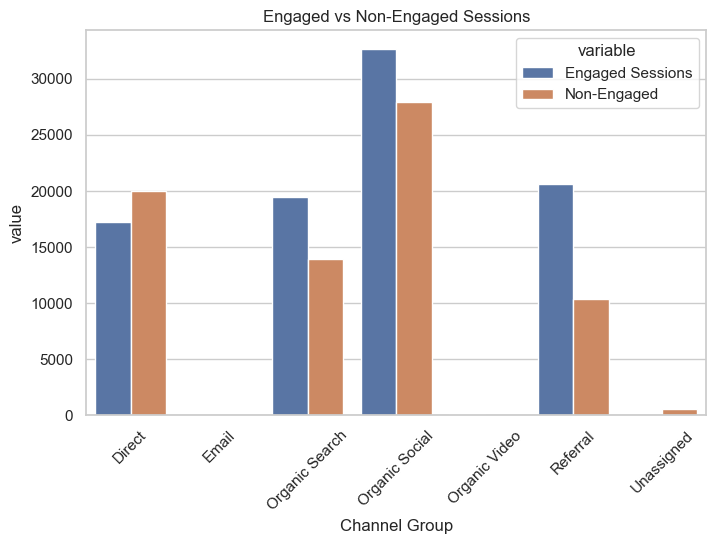

In [33]:
session_df=df.groupby("Channel Group")[["Sessions", "Engaged Sessions"]].sum().reset_index()
session_df["Non-Engaged"]=session_df["Sessions"]-session_df["Engaged Sessions"]
session_df_melted=session_df.melt(id_vars="Channel Group", value_vars=["Engaged Sessions", "Non-Engaged"])

plt.figure(figsize=(8,5))
sns.barplot(data=session_df_melted, x="Channel Group", y="value", hue="variable")
plt.title("Engaged vs Non-Engaged Sessions")
plt.xticks(rotation=45)
plt.show()

# Traffic by Hour and Channel

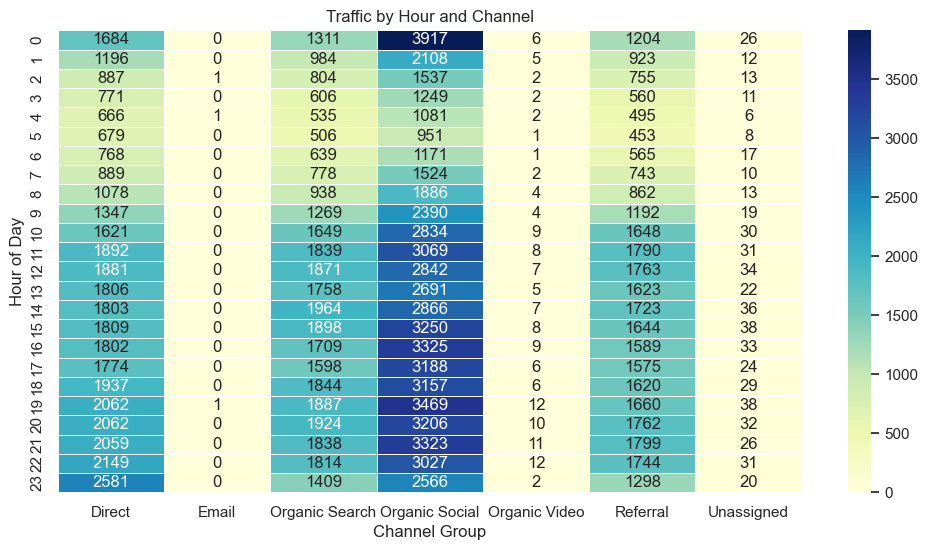

In [36]:
heatmap_data=df.groupby(["Hour", "Channel Group"])["Sessions"].sum().unstack().fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5, annot=True, fmt='.0f')
plt.title("Traffic by Hour and Channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour of Day")
plt.show()

# Engagement Rate vs Sessions over Time

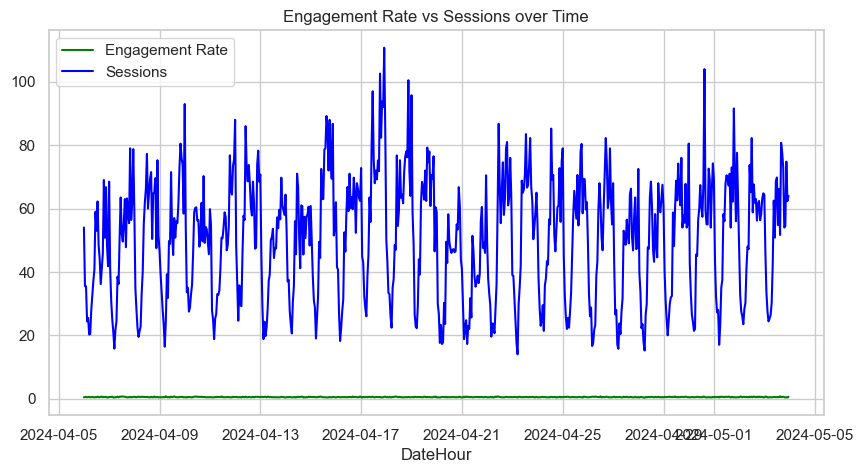

In [37]:
df_plot=df.groupby("DateHour")[["Engagement Rate", "Sessions"]].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(df_plot["DateHour"], df_plot["Engagement Rate"], label="Engagement Rate", color="green")
plt.plot(df_plot["DateHour"], df_plot["Sessions"], label="Sessions", color="blue")
plt.title("Engagement Rate vs Sessions over Time")
plt.xlabel("DateHour")
plt.legend()
plt.grid(True)
plt.show()